# GBDT学习

In [8]:
from sklearn.datasets import make_hastie_10_2
make_hastie_10_2(random_state=0) #0记录随机状态，保持一致 None

(array([[ 1.76405235,  0.40015721,  0.97873798, ..., -0.15135721,
         -0.10321885,  0.4105985 ],
        [ 0.14404357,  1.45427351,  0.76103773, ..., -0.20515826,
          0.3130677 , -0.85409574],
        [-2.55298982,  0.6536186 ,  0.8644362 , ..., -0.18718385,
          1.53277921,  1.46935877],
        ..., 
        [ 0.19986465,  0.26134578, -0.1279868 , ..., -0.51718289,
          0.07969414,  1.01612661],
        [-0.15167316, -1.42519962,  1.07092211, ..., -1.20676602,
         -1.04746487,  0.0075881 ],
        [-0.09708998,  0.78044425,  0.22108152, ...,  2.53170549,
         -0.03572203,  0.17320019]]),
 array([ 1., -1.,  1., ..., -1., -1.,  1.]))

In [14]:
X,y = make_hastie_10_2(random_state=0)
print(X.shape)
X_train,X_test = X[:2000],X[2000:]
y_train,y_test = y[:2000],y[2000:]
print(X_test.shape)

(12000, 10)
(10000, 10)


In [16]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1,random_state=0).fit(X_train,y_train)
clf.score(X_test,y_test)

0.91300000000000003

In [23]:
import numpy as np
from sklearn.datasets import make_friedman1
X,y = make_friedman1(n_samples = 1200,random_state = 0,noise=1.0)
print('X:',X)
print('y:',y)
print(X.shape)

X: [[ 0.5488135   0.71518937  0.60276338 ...,  0.891773    0.96366276
   0.38344152]
 [ 0.79172504  0.52889492  0.56804456 ...,  0.83261985  0.77815675
   0.87001215]
 [ 0.97861834  0.79915856  0.46147936 ...,  0.94466892  0.52184832
   0.41466194]
 ..., 
 [ 0.57898333  0.39359572  0.27047038 ...,  0.67307841  0.63826664
   0.92396041]
 [ 0.51714689  0.01247605  0.88033171 ...,  0.95474566  0.03571074
   0.03019949]
 [ 0.44833838  0.58570262  0.17661008 ...,  0.84348096  0.94290928
   0.83282242]]
y: [ 18.40631483  19.60677754  14.74407804 ...,  11.46321759   6.49856896
  20.32981295]
(1200, 10)


In [24]:
X_train, X_test = X[:200], X[200:]
y_train, y_test = y[:200], y[200:]

In [90]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
est = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=1,random_state=0,loss='ls').fit(X_train,y_train)
mean_squared_error(y_test,est.predict(X_test))

5.0091548599603213

fit 额外的弱学习器 Both GradientBoostingRegressor and GradientBoostingClassifier support warm_start=True 
which allows you to add more estimators to an already fitted model.

In [91]:
_ = est.set_params(n_estimators=200,warm_start = True) # set warm_start and new nr of trees
_ = est.fit(X_train,y_train) # fit additional 100 trees to est
mean_squared_error(y_test,est.predict(X_test))

3.8402347411053559

In [65]:
est.feature_importances_  #十个特征的重要性

array([ 0.21,  0.19,  0.21,  0.25,  0.14,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ])

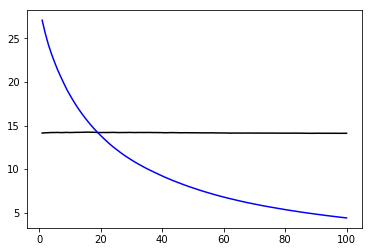

In [66]:
est.train_score_  #100个estimator的训练误差
a = est.staged_predict(X_test)  #这是一个迭代器 测试误差
lst = []
for i in a:
    lst.append(np.mean(i))

%matplotlib inline
import matplotlib.pyplot as plt
xx = np.linspace(1,100,100)
plt.plot(xx,lst,'k-')
plt.plot(xx,est.train_score_,'b-')

In [107]:
from sklearn import datasets
boston = datasets.load_boston()
boston

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

In [103]:
housing = datasets.fetch_california_housing()

downloading Cal. housing from http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz to C:\Users\Hongchen\scikit_learn_data


In [108]:
housing

{'DESCR': 'California housing dataset.\n\nThe original database is available from StatLib\n\n    http://lib.stat.cmu.edu/\n\nThe data contains 20,640 observations on 9 variables.\n\nThis dataset contains the average house value as target variable\nand the following input variables (features): average income,\nhousing average age, average rooms, average bedrooms, population,\naverage occupation, latitude, and longitude in that order.\n\nReferences\n----------\n\nPace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,\nStatistics and Probability Letters, 33 (1997) 291-297.\n\n',
 'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ..., 
        [   1.7       ,   17.        ,    

In [ ]:
datasets.f